# 1. Loading and previewing the data

In [ ]:
# few of the basic libraries to make and edit dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/solar_irradiation_data.csv')
df.head()

Mounted at /content/drive


,Time,Timezone,GHI_AVG,DNI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG,RAIN_SUM
0,2019-07-01 00:00:00,ACST,-1.251141,-1.681195,226.046751,0.270745,4.599429,49.373845,0.0
1,2019-07-01 01:00:00,ACST,-1.105491,-1.564169,231.856001,0.438133,3.880017,50.883139,0.0
2,2019-07-01 02:00:00,ACST,-1.110939,-1.588327,235.262640,0.391107,3.119183,53.990385,0.0
3,2019-07-01 03:00:00,ACST,-0.995637,-1.483157,246.829333,0.444790,3.146530,54.673470,0.0
4,2019-07-01 04:00:00,ACST,-1.001849,-1.464027,249.490834,0.454146,5.106388,48.845702,0.0


In [ ]:
cols = df.columns
cols

Index(['Time', 'Timezone', 'GHI_AVG', 'DNI_AVG', 'WDIR_AVG', 'WSPD_AVG',
       'TEMP_AVG', 'HUM_AVG', 'RAIN_SUM'],
      dtype='object')

In [ ]:
# ONLY RUN WHEN THE DATASET IS BEING USED DIRECTLY
df1 = df.copy()
df1['TIME'] = pd.to_datetime(df1['Time'])
df1['hour'] = df1['TIME'].dt.hour

df1.drop(['Timezone'], axis = 1, inplace = True)
df1.drop(['RAIN_SUM'], axis = 1, inplace = True)
df1.drop(['TIME'],axis =1, inplace = True)

df1 = df1.dropna(subset = ['GHI_AVG'])

# Do something about the Nan and -ve values, cause it creates an issue
df1.loc[(df1['GHI_AVG'] < 0) | (df1['DNI_AVG'] < 0) | (df1['WDIR_AVG']<0) | (df1['WSPD_AVG']<0) | (df1['TEMP_AVG']<0) | (df1['HUM_AVG']<0), ['GHI_AVG', 'DNI_AVG', 'WDIR_AVG', 'WSPD_AVG','TEMP_AVG', 'HUM_AVG', 'RAIN_SUM']] = 0

df1

,Time,GHI_AVG,DNI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG,hour,RAIN_SUM
0,2019-07-01 00:00:00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,0.0
1,2019-07-01 01:00:00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1,0.0
2,2019-07-01 02:00:00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2,0.0
3,2019-07-01 03:00:00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3,0.0
4,2019-07-01 04:00:00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4,0.0
...,...,...,...,...,...,...,...,...,...
27809,2022-09-01 17:00:00,28.101389,0.0,145.524306,1.942893,12.795519,95.269921,17,NaN
27810,2022-09-01 18:00:00,0.883333,0.0,136.775139,1.787685,12.445601,98.542388,18,NaN
27811,2022-09-01 19:00:00,0.000000,0.0,135.269583,2.099801,11.979293,99.854972,19,NaN
27812,2022-09-01 20:00:00,0.000000,0.0,129.577778,0.919404,11.599545,99.721071,20,NaN


In [ ]:
df1.describe()

,GHI_AVG,DNI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG,hour,RAIN_SUM
count,25842.000000,25842.000000,25842.000000,25842.000000,25842.000000,25842.000000,25842.000000,8083.0
mean,260.080333,306.016622,109.525318,1.094615,15.572162,25.284537,11.518613,0.0
std,351.265701,398.354978,96.060695,1.302488,13.039717,24.949310,6.918370,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.0
50%,0.819444,0.000000,116.575126,0.525600,16.907557,21.071548,12.000000,0.0
75%,548.069702,767.101214,178.500056,2.047388,26.535926,39.142933,18.000000,0.0
max,1170.911090,1076.749711,325.554167,58.192218,44.854888,99.932081,23.000000,0.0


In [ ]:
# df1 = df.dropna(subset =['GHI_AVG'])
# df1 = df1.set_index('Time')
# df1

# df1.index = pd.to_datetime(df1.index)

# df1['hour'] = df1.index.hour
# df1['dayofweek'] = df1.index.dayofweek
# df1

# cols = df1.columns
# cols

# keep_cols = ['GHI_AVG', 'DNI_AVG', 'WDIR_AVG', 'WSPD_AVG', 'TEMP_AVG','HUM_AVG', 'RAIN_SUM', 'hour']
# df1 = df1.loc[:, keep_cols]
# df1

In [ ]:
dft=df1.set_index('Time').T.reset_index(drop=False) 
dft
# df=pd.read_csv('input.csv',header=None)
# dft = df1.T.rename(columns={0:'Index',1:'Value'})
# print df['Value']

# df_transpose = df1.T.reset_index()
# df_transpose=df1.set_index(0).T.reset_index(drop=True) 
# df_transpose
# df_transpose.rename(columns = {0:'Index,1:Value'})
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html

Time,index,2019-07-01 00:00:00,2019-07-01 01:00:00,2019-07-01 02:00:00,2019-07-01 03:00:00,2019-07-01 04:00:00,2019-07-01 05:00:00,2019-07-01 06:00:00,2019-07-01 07:00:00,2019-07-01 08:00:00,...,2022-09-01 12:00:00,2022-09-01 13:00:00,2022-09-01 14:00:00,2022-09-01 15:00:00,2022-09-01 16:00:00,2022-09-01 17:00:00,2022-09-01 18:00:00,2022-09-01 19:00:00,2022-09-01 20:00:00,2022-09-01 21:00:00
0,GHI_AVG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.691893,205.014492,...,171.306944,146.815278,397.580556,120.298611,99.322222,28.101389,0.883333,0.000000,0.000000,0.000000
1,DNI_AVG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.923585,702.892465,...,0.000000,0.000000,42.477778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,WDIR_AVG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.649389,194.149584,...,107.092917,106.599028,98.092639,143.875417,141.260417,145.524306,136.775139,135.269583,129.577778,145.930000
3,WSPD_AVG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.563628,1.109589,...,1.056710,1.626819,2.646124,1.976757,1.864640,1.942893,1.787685,2.099801,0.919404,0.739417
4,TEMP_AVG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.970904,13.686888,...,10.964323,11.592841,12.566402,12.903492,12.915450,12.795519,12.445601,11.979293,11.599545,11.415985
5,HUM_AVG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.616153,28.857826,...,99.881789,99.856209,98.669837,96.680905,95.157149,95.269921,98.542388,99.854972,99.721071,99.879030
6,hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.000000,8.000000,...,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000
7,RAIN_SUM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dft['index']

0     GHI_AVG
1     DNI_AVG
2    WDIR_AVG
3    WSPD_AVG
4    TEMP_AVG
5     HUM_AVG
6        hour
7    RAIN_SUM
Name: index, dtype: object

In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Columns: 25843 entries, index to 2022-09-01 21:00:00
dtypes: float64(25842), object(1)
memory usage: 1.6+ MB


In [ ]:
start_date = dft.columns[1]
end_date = dft.columns[-1]
print('Data ranges from %s to %s' % (start_date, end_date))

Data ranges from 2019-07-01 00:00:00 to 2022-09-01 21:00:00


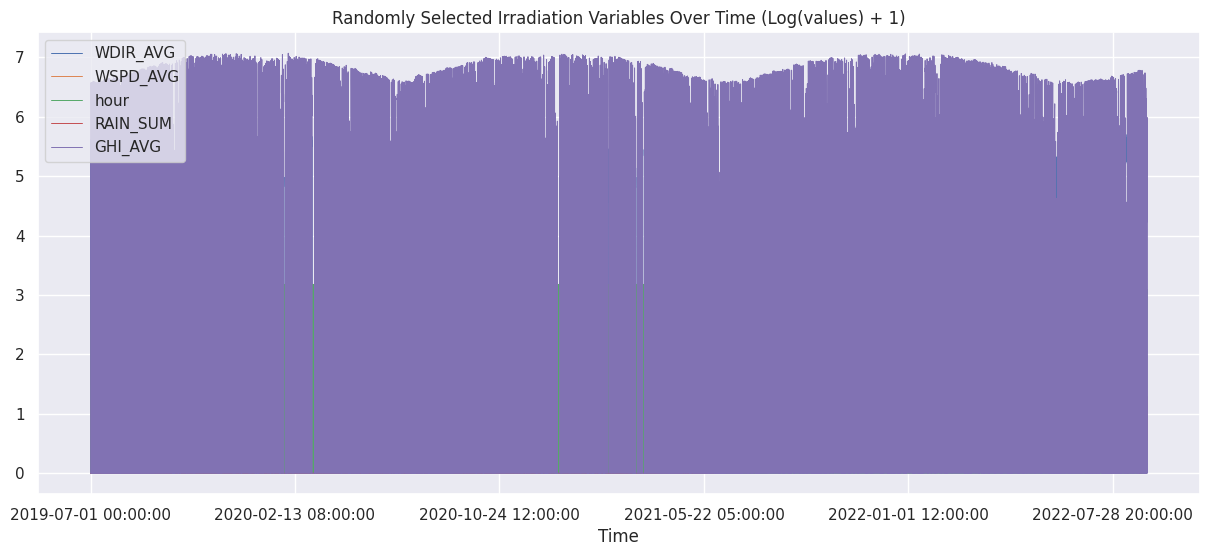

In [ ]:
def plot_random_series(df, n_series):
    
    sample = dft.sample(n_series, random_state=10)
    page_labels = sample['index'].tolist()
    series_samples = sample.loc[:,start_date:end_date]
    
    plt.figure(figsize=(15,6))
    
    for i in range(series_samples.shape[0]):
        np.log1p(pd.Series(series_samples.iloc[i]).astype(np.float64)).plot(linewidth=0.7)
    
    plt.title('Randomly Selected Irradiation Variables Over Time (Log(values) + 1)')
    plt.legend(page_labels)
    
plot_random_series(df, 5)

In [ ]:
# pred_steps = 24 * 7 # 24 hours a day afor a week
# pred_length=timedelta(hours = pred_steps)

# first_day = pd.to_datetime(start_date) 
# # first_day = first_day.date()
# # first_day

# last_day = pd.to_datetime(end_date)
# # end_day = end_day.date()
# # end_day

# val_pred_start = last_day - pred_length + timedelta(hours = 1)
# val_pred_start
# val_pred_end = last_day
# val_pred_end
# val_pred_end - val_pred_start

# train_pred_start = val_pred_start - pred_length
# train_pred_start
# # train_pred_end = val_pred_start - timedelta(days=1) 
# # train_pred_end

In [ ]:
from datetime import timedelta

pred_steps = 24 * 7 # 24 hours a day afor a week
pred_length=timedelta(hours = pred_steps)
# pred_length

first_day = pd.to_datetime(start_date) 
last_day = pd.to_datetime(end_date)

val_pred_start = last_day - pred_length + timedelta(hours=1)
val_pred_end = last_day

train_pred_start = val_pred_start - pred_length
train_pred_end = val_pred_start - timedelta(hours=1)
train_pred_end - train_pred_start

Timedelta('6 days 23:00:00')

In [ ]:
enc_length = train_pred_start - first_day

train_enc_start = first_day
train_enc_end = train_enc_start + enc_length - timedelta(hours=1)

val_enc_start = train_enc_start + pred_length
val_enc_end = val_enc_start + enc_length - timedelta(hours=1) 

In [ ]:
print('Train encoding:', train_enc_start, '-', train_enc_end)
print('Train prediction:', train_pred_start, '-', train_pred_end, '\n')
print('Val encoding:', val_enc_start, '-', val_enc_end)
print('Val prediction:', val_pred_start, '-', val_pred_end)

print('\nEncoding interval:', enc_length.days)
print('Prediction interval:', pred_length.days)

Train encoding: 2019-07-01 00:00:00 - 2022-08-18 21:00:00
Train prediction: 2022-08-18 22:00:00 - 2022-08-25 21:00:00 

Val encoding: 2019-07-08 00:00:00 - 2022-08-25 21:00:00
Val prediction: 2022-08-25 22:00:00 - 2022-09-01 21:00:00

Encoding interval: 1144
Prediction interval: 7


Keras Data Formatting

In [ ]:
date_to_index = pd.Series(index=pd.Index([pd.to_datetime(c) for c in dft.columns[1:]]),
                          data=[i for i in range(len(dft.columns[1:]))])
# date_to_index

series_array = dft[dft.columns[1:]].values
# series_array

def get_time_block_series(series_array, date_to_index, start_date, end_date):
    
    # Get the indices corresponding to the start and end dates
    start_index = date_to_index[start_date]
    end_index = date_to_index[end_date]

    # Slice the series array to get the time block series
    time_block_series = series_array[:, start_index:end_index+1]

    return time_block_series

def transform_series_encode(series_array):
    
    series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_mean = series_array.mean(axis=1).reshape(-1,1) 
    series_array = series_array - series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array, series_mean

def transform_series_decode(series_array, encode_series_mean):

    series_array = np.log1p(np.nan_to_num(series_array))
    series_arary = series_array - encode_series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1],1))

    return series_array    

Building The model, Training Architecture

In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense
from keras.optimizers import Adam

latent_dim = 50 # LSTM hidden units
dropout = .20 

# Define an input series and encode it with an LSTM. 
encoder_inputs = Input(shape=(None, 1)) 
encoder = LSTM(latent_dim, dropout=dropout, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

# We discard `encoder_outputs` and only keep the final states. These represent the "context"
# vector that we use as the basis for decoding.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
# This is where teacher forcing inputs are fed in.
decoder_inputs = Input(shape=(None, 1)) 

# We set up our decoder using `encoder_states` as initial state.  
# We return full output sequences and return internal states as well. 
# We don't use the return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, dropout=dropout, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)

decoder_dense = Dense(1) # 1 continuous output at each timestep
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

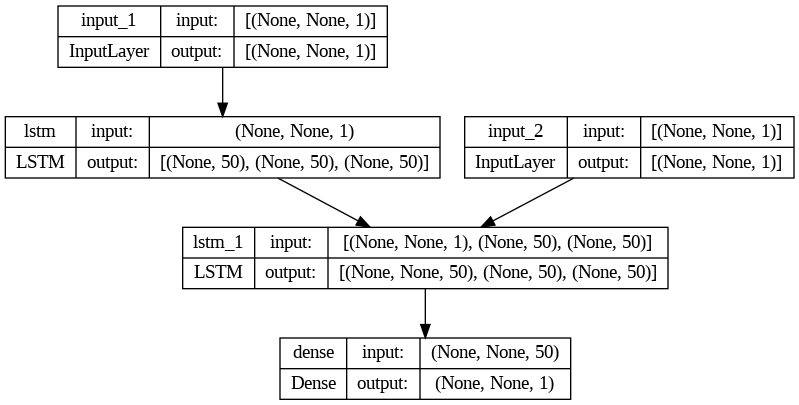

In [ ]:
from keras.utils.vis_utils import plot_model

# Plot the model architecture
plot_model(model, to_file='model.png', show_shapes=True)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 1)]    0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None, 1)]    0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 50),         10400       ['input_1[0][0]']                
                                 (None, 50),                                                      
                                 (None, 50)]                                                      
                                                                                              

In [ ]:
first_n_samples = 2 # ideally if possoble, 20000
batch_size = 2**7
epochs = 100 # ideally should be 100

# sample of series from train_enc_start to train_enc_end  
encoder_input_data = get_time_block_series(series_array, date_to_index, 
                                           train_enc_start, train_enc_end)[:first_n_samples]
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

# sample of series from train_pred_start to train_pred_end 
decoder_target_data = get_time_block_series(series_array, date_to_index, 
                                            train_pred_start, train_pred_end)[:first_n_samples]
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

# lagged target series for teacher forcing
decoder_input_data = np.zeros(decoder_target_data.shape)
decoder_input_data[:,1:,0] = decoder_target_data[:,:-1,0]
decoder_input_data[:,0,0] = encoder_input_data[:,-1,0]

model.compile(Adam(), loss='mean_absolute_error')
history = model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
                     batch_size=batch_size,
                     epochs=epochs,
                     validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 10s 10s/step - loss: 3.0537 - val_loss: 3.1106
Epoch 2/100
1/1 [==============================] - 5s 5s/step - loss: 2.9630 - val_loss: 3.0838
Epoch 3/100
1/1 [==============================] - 6s 6s/step - loss: 2.9354 - val_loss: 3.0737
Epoch 4/100
1/1 [==============================] - 5s 5s/step - loss: 2.9267 - val_loss: 3.0672
Epoch 5/100
1/1 [==============================] - 6s 6s/step - loss: 2.9167 - val_loss: 3.0581
Epoch 6/100
1/1 [==============================] - 5s 5s/step - loss: 2.8971 - val_loss: 3.0469
Epoch 7/100
1/1 [==============================] - 5s 5s/step - loss: 2.8791 - val_loss: 3.0341
Epoch 8/100
1/1 [==============================] - 6s 6s/step - loss: 2.8650 - val_loss: 3.0197
Epoch 9/100
1/1 [==============================] - 5s 5s/step - loss: 2.8560 - val_loss: 3.0041
Epoch 10/100
1/1 [==============================] - 6s 6s/step - loss: 2.8284 - val_loss: 2.9876
Epoch 11/100
1/1 [===================

Convergence curve of training.validation loss

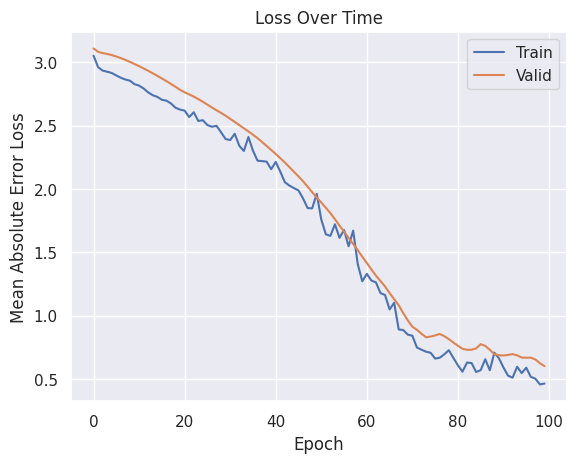

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

Buildiung the Model

In [ ]:
# from our previous model - mapping encoder sequence to state vectors
encoder_model = Model(encoder_inputs, encoder_states)

# A modified version of the decoding stage that takes in predicted target inputs
# and encoded state vectors, returning predicted target outputs and decoder state vectors.
# We need to hang onto these state vectors to run the next step of the inference loop.
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]

decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs,
                      [decoder_outputs] + decoder_states)

def decode_sequence(input_seq):
    
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, 1))
    
    # Populate the first target sequence with end of encoding series pageviews
    target_seq[0, 0, 0] = input_seq[0, -1, 0]

    # Sampling loop for a batch of sequences - we will fill decoded_seq with predictions
    # (to simplify, here we assume a batch of size 1).

    decoded_seq = np.zeros((1,pred_steps,1))
    
    for i in range(pred_steps):
        
        output, h, c = decoder_model.predict([target_seq] + states_value)
        
        decoded_seq[0,i,0] = output[0,0,0]

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, 1))
        target_seq[0, 0, 0] = output[0,0,0]

        # Update states
        states_value = [h, c]

    return decoded_seq

Generating and plotting Predictions

In [ ]:
encoder_input_data = get_time_block_series(series_array, date_to_index, val_enc_start, val_enc_end)
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

decoder_target_data = get_time_block_series(series_array, date_to_index, val_pred_start, val_pred_end)
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

In [ ]:
def predict_and_plot(encoder_input_data, decoder_target_data, sample_ind, enc_tail_len=50):

    encode_series = encoder_input_data[sample_ind:sample_ind+1,:,:] 
    pred_series = decode_sequence(encode_series)
    
    encode_series = encode_series.reshape(-1,1)
    pred_series = pred_series.reshape(-1,1)   
    target_series = decoder_target_data[sample_ind,:,:1].reshape(-1,1) 
    
    encode_series_tail = np.concatenate([encode_series[-enc_tail_len:],target_series[:1]])
    x_encode = encode_series_tail.shape[0]
    
    plt.figure(figsize=(10,6))   
    
    plt.plot(range(1,x_encode+1),encode_series_tail)
    plt.plot(range(x_encode,x_encode+pred_steps),target_series,color='orange')
    plt.plot(range(x_encode,x_encode+pred_steps),pred_series,color='teal',linestyle='--')
    
    plt.title('Encoder Series Tail of Length %d, Target Series, and Predictions' % enc_tail_len)
    plt.legend(['Encoding Series','Target Series','Predictions'])

1/1 [==============================] - 0s 19ms/step


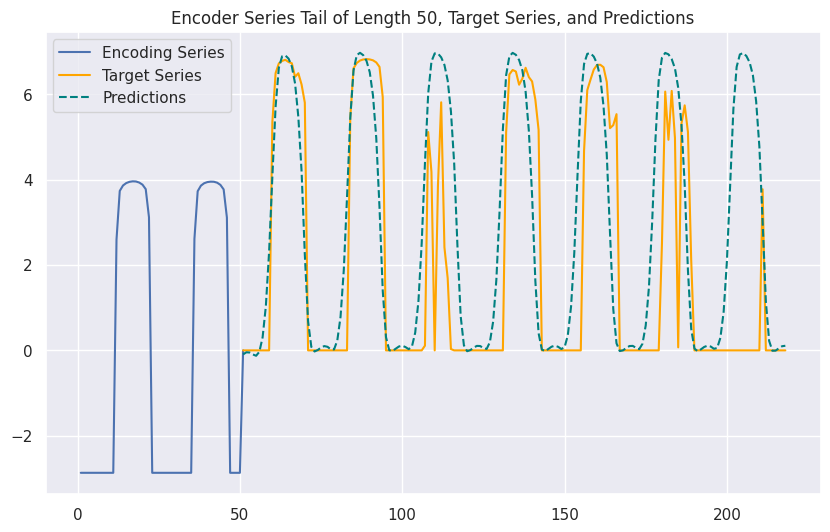

In [ ]:
predict_and_plot(encoder_input_data, decoder_target_data, 1)

1/1 [==============================] - 0s 28ms/step


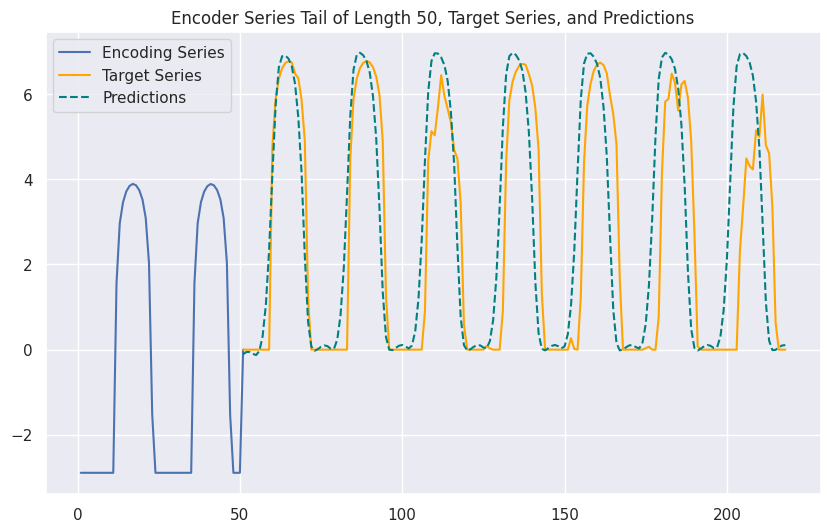

In [ ]:
predict_and_plot(encoder_input_data, decoder_target_data, 0)

1/1 [==============================] - 0s 18ms/step


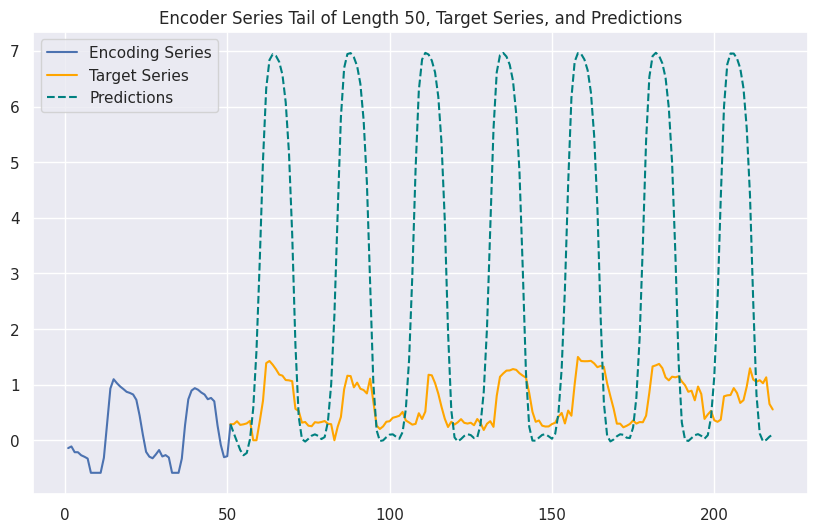

In [ ]:
predict_and_plot(encoder_input_data, decoder_target_data, 3)